# Machine Learning, GoMore

In [3]:
import pandas as pd
df = pd.read_csv('GoMore_Data_DK_270818.csv', sep=',', low_memory=False)
df.head()

,id,depart_date_time,seats,free_seats,user_id,handle_fee_rate,handle_fee_ceiling_factor,accept_cash,accept_online_payment,quick_booking,...,time_minute,time_minute_hour,time_cat,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening
0,7385002,2018-08-07T15:30:00+02:00,2,0,269889,12.5,100,False,True,True,...,30,15.50,Afternoon,0,0,0,0,1,0,0
1,7385006,2018-08-07T14:00:00+02:00,3,3,1399528,12.5,100,False,True,True,...,0,14.00,Noon,0,0,0,1,0,0,0
2,7385007,2018-08-09T08:30:00+02:00,1,0,1438456,12.5,100,False,True,True,...,30,8.50,Morning,0,1,0,0,0,0,0
3,7385010,2018-08-07T06:45:00+02:00,3,3,906186,12.5,100,False,True,True,...,45,6.75,Morning,0,1,0,0,0,0,0
4,7385011,2018-08-10T16:15:00+02:00,2,1,2318925,12.5,100,False,True,False,...,15,16.25,Afternoon,0,0,0,0,1,0,0


In [50]:
df.keys()

Index(['id', 'depart_date_time', 'seats', 'free_seats', 'user_id',
       'handle_fee_rate', 'handle_fee_ceiling_factor', 'accept_cash',
       'accept_online_payment', 'quick_booking', 'flex_booking', 'currency_id',
       'detour_preference', 'duration', 'kids', 'music', 'animals', 'comfort',
       'smoking', 'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr',
       'id_dep', 'latitude_dep', 'longitude_dep', 'name_dep', 'time', 'date',
       'weekday', 'year', 'month', 'SJ_dep', 'SJ_arr', 'SJ_dep_int',
       'SJ_arr_int', 'accept_cash_int', 'accept_online_payment_int',
       'quick_booking_int', 'flex_booking_int', 'det_15_minutes',
       'det_5_minutes', 'det_flexible', 'det_none', 'price_DKK', 'distance_KM',
       'DKK_per_KM', 'taken_seats', 'toll_road', 'toll_road_bool', 'time_hour',
       'time_minute', 'time_minute_hour', 'time_cat', 'Night', 'Morning',
       'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening'],
      dtype='object')

In [55]:
sample = df.drop(['id', 'depart_date_time', 'handle_fee_rate', 'handle_fee_ceiling_factor', 'accept_cash', 'accept_online_payment',
        'currency_id', 'id_arr', 'latitude_arr', 'longitude_arr', 'name_arr', 
        'id_dep', 'latitude_dep', 'longitude_dep', 'name_dep', 'toll_road', 'time', 'date',
        'accept_cash', 'accept_online_payment', 'time_hour', 'time_minute', 'time_minute_hour',
                  'detour_preference', 'toll_road', 'time_hour', 'time_minute', 'time_minute_hour',
                  'SJ_dep', 'SJ_arr', 'quick_booking', 'flex_booking', 'time_cat',
                 'DKK_per_KM'], axis=1)
#remember to drop DKK_per_KM
sample.head()

,seats,free_seats,user_id,duration,kids,music,animals,comfort,smoking,weekday,...,distance_KM,taken_seats,toll_road_bool,Night,Morning,Forenoon,Noon,Afternoon,Evening,Late_evening
0,2,0,269889,9644,1,1,1,0,0,1,...,271.775,2,1,0,0,0,0,1,0,0
1,3,3,1399528,14325,0,0,0,1,0,1,...,343.083,0,1,0,0,0,1,0,0,0
2,1,0,1438456,9520,0,0,0,0,0,3,...,268.189,1,1,0,1,0,0,0,0,0
3,3,3,906186,4104,1,1,0,1,0,1,...,73.159,0,0,0,1,0,0,0,0,0
4,2,1,2318925,3502,1,1,0,1,0,4,...,74.306,1,0,0,0,0,0,1,0,0


In [56]:
sample.keys()

Index(['seats', 'free_seats', 'user_id', 'duration', 'kids', 'music',
       'animals', 'comfort', 'smoking', 'weekday', 'year', 'month',
       'SJ_dep_int', 'SJ_arr_int', 'accept_cash_int',
       'accept_online_payment_int', 'quick_booking_int', 'flex_booking_int',
       'det_15_minutes', 'det_5_minutes', 'det_flexible', 'det_none',
       'price_DKK', 'distance_KM', 'taken_seats', 'toll_road_bool', 'Night',
       'Morning', 'Forenoon', 'Noon', 'Afternoon', 'Evening', 'Late_evening'],
      dtype='object')

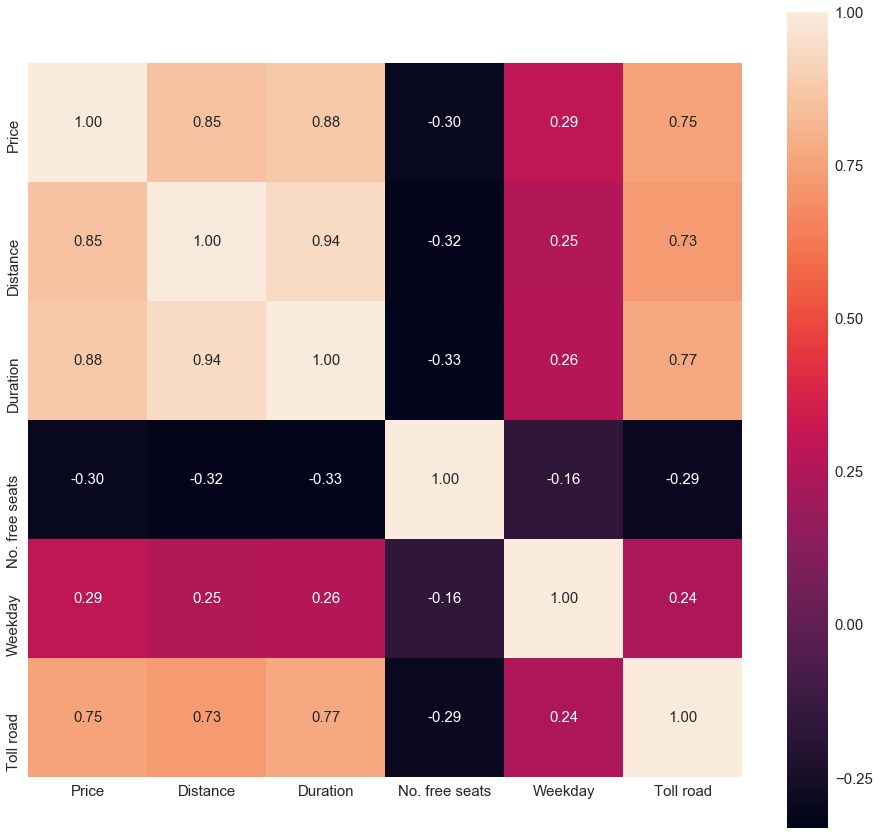

In [57]:
#correlation matrix - help to select features based on linear corr
# - interested in features that have a high correlation with target variabel price
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cols = ['price_DKK', 'distance_KM', 'duration', 'free_seats', 'weekday', 'toll_road_bool']
col_names = ['Price', 'Distance', 'Duration', 'No. free seats', 'Weekday', 'Toll road']
cm = np.corrcoef(sample[cols].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize = (16,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size':15}, 
                 yticklabels=col_names, xticklabels=col_names)
fig = hm.get_figure()
fig.savefig('/Users/bruger/Downloads/korrelationsmatrix.png')
plt.show()

In [ ]:
#good linear relationship between price and distance? see p. 463 in PML

In [58]:
#multiple linear regression model
X = sample.drop(['price_DKK'], axis=1).values
y = sample['price_DKK'].values

In [59]:
#split into training data, 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1) 

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import cross_val_score #cross validation (gør kfold selv)
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [117]:
#OLS
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import math

pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
reg = pipe_lr.fit(X_train, y_train)
rmse_ols_train = math.sqrt(mse(reg.predict(X_train),y_train))
print(rmse_ols_train)
mae_ols_train = mae(reg.predict(X_train),y_train)
print(mae_ols_train)
rmse_ols_test = math.sqrt(mse(reg.predict(X_test),y_test))
print(rmse_ols_test)
mae_ols_test = mae(reg.predict(X_test),y_test)
print(mae_ols_test)

21.529827368426243
14.073419576245698
20.900847219431924
13.664565616286644


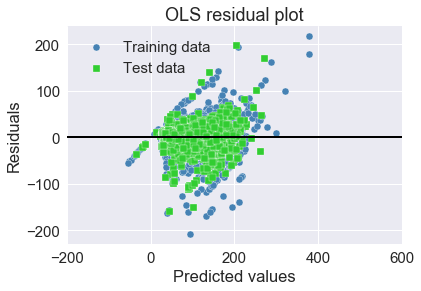

In [119]:
from sklearn.linear_model import LinearRegression
reg = pipe_lr.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

#residual plot
plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('OLS residual plot')
plt.hlines(y=0, xmin=-10000, xmax=100000, color='black', lw=2)
plt.xlim([-200, 600])
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error
print('Mse train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                      mean_squared_error(y_test, y_test_pred)))

Mse train: 463.533, test: 436.845


In [64]:
#måske vi skal øge antallet af iterations? se convergence warnings
cv_lasso_rmse =  []
cv_lasso_mae = []
cv_ridge_rmse = []
cv_ridge_mae = []
cv_ela_rmse = []
cv_ela_mae = []
ela_net_combs = []

alphas = np.logspace(-1, 1, 10) #set hyperparameter space for OLS, Lasso, Ridge
lambdas = np.logspace(-1, 1, 10) #set extra hyperparameter space for ElaNet

for alpha_1 in alphas:
    
    pipe_lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha_1))
    scores_lasso_rmse = cross_val_score(pipe_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores_lasso_mae = cross_val_score(pipe_lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_lasso_rmse.append(list(map(lambda x: math.sqrt(-1*x), scores_lasso_rmse)))
    cv_lasso_mae.append(list(-1*scores_lasso_mae))
    
    pipe_ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha_1))
    scores_ridge_rmse = cross_val_score(pipe_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores_ridge_mae = cross_val_score(pipe_ridge, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_ridge_rmse.append(list(map(lambda x: math.sqrt(-1*x), scores_ridge_rmse)))
    cv_ridge_mae.append(list(-1*scores_ridge_mae))
    
    for alpha_2 in lambdas:
        pipe_ela = make_pipeline(StandardScaler(), ElasticNet(alpha=alpha_1, l1_ratio=alpha_2))
        scores_ela_rmse = cross_val_score(pipe_ela, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        scores_ela_mae = cross_val_score(pipe_ela, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        cv_ela_rmse.append(list(map(lambda x: math.sqrt(-1*x), scores_ela_rmse)))
        cv_ela_mae.append(list(-1*scores_ela_mae))
        ela_net_combs.append((alpha_1, alpha_2))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [65]:
optimal_lasso_rmse = pd.DataFrame(cv_lasso_rmse, index=alphas).mean(axis=1).nsmallest(1)
print(optimal_lasso_rmse)
optimal_lasso_mae = pd.DataFrame(cv_lasso_mae, index=alphas).mean(axis=1).nsmallest(1)
print(optimal_lasso_mae)
optimal_ridge_rmse = pd.DataFrame(cv_ridge_rmse, index=alphas).mean(axis=1).nsmallest(1)
print(optimal_ridge_rmse)
optimal_ridge_mae = pd.DataFrame(cv_ridge_mae, index=alphas).mean(axis=1).nsmallest(1)
print(optimal_ridge_mae)

0.1    21.607266
dtype: float64
0.278256    14.11936
dtype: float64
10.0    21.612096
dtype: float64
0.1    14.140021
dtype: float64


In [66]:
#find mean og std for hver liste fra før - plot dem
lasso_mean_rmse = np.mean(cv_lasso_rmse, axis=1)
ridge_mean_rmse = np.mean(cv_ridge_rmse, axis=1)

lasso_std_rmse = np.std(cv_lasso_rmse, axis=1)
ridge_std_rmse = np.std(cv_ridge_mae, axis=1)

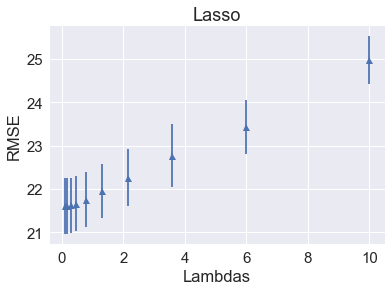

<Figure size 432x288 with 0 Axes>

In [67]:
plt.errorbar(alphas, lasso_mean_rmse, yerr=lasso_std_rmse, linestyle='None', marker='^')
plt.xlabel('Lambdas')
plt.ylabel('RMSE')
plt.title('Lasso')
plt.show()
plt.savefig("errorplot_lasso.png")

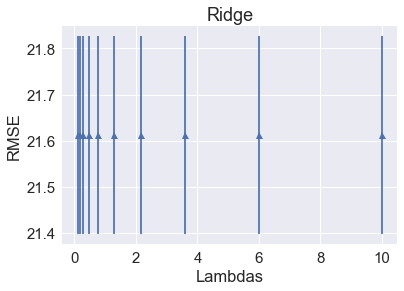

In [69]:
plt.errorbar(alphas, ridge_mean_rmse, yerr=ridge_std_rmse, linestyle='None', marker='^')
plt.xlabel('Lambdas')
plt.ylabel('RMSE')
plt.title('Ridge')
#plt.ylim((18,20))
plt.show()

In [70]:
pipe_lasso_optimal_rmse = make_pipeline(StandardScaler(),
                           Lasso(alpha=optimal_lasso_rmse.index[0]))
pipe_lasso_optimal_mae = make_pipeline(StandardScaler(),
                           Lasso(alpha=optimal_lasso_mae.index[0]))
pipe_ridge_optimal_rmse = make_pipeline(StandardScaler(),
                           Ridge(alpha=optimal_ridge_rmse.index[0]))
pipe_ridge_optimal_mae = make_pipeline(StandardScaler(),
                           Ridge(alpha=optimal_ridge_mae.index[0]))

pipe_lasso_optimal_rmse.fit(X_train,y_train)
pipe_lasso_optimal_mae.fit(X_train,y_train)
pipe_ridge_optimal_rmse.fit(X_train,y_train)
pipe_ridge_optimal_mae.fit(X_train,y_train)

print('Lasso_rmse', math.sqrt(mse(pipe_lasso_optimal_rmse.predict(X_train),y_train)))
print('Lasso_mae', mae(pipe_lasso_optimal_mae.predict(X_train),y_train))

print('Ridge_rmse', math.sqrt(mse(pipe_ridge_optimal_rmse.predict(X_train),y_train)))
print('Ridge_mae', mae(pipe_ridge_optimal_mae.predict(X_train),y_train))

#print('Lasso_test', round(mse(pipe_lasso_optimal.predict(X_test),y_test), 3))
#print('LinReg_test', round(mse(pipe_lr.predict(X_test),y_test), 3))

Lasso_rmse 21.53424671067313
Lasso_mae 14.087962792036299
Ridge_rmse 21.529224972855914
Ridge_mae 14.086179236627357


In [71]:
import math
pipe_elanet_optimal = make_pipeline(StandardScaler(), 
                                         ElasticNet(alpha=0.1, l1_ratio=0.774264))
pipe_elanet_optimal.fit(X_train,y_train)
                                    
print(math.sqrt(mse(pipe_elanet_optimal.predict(X_train),y_train)))
print(mae(pipe_elanet_optimal.predict(X_train),y_train))

21.54935415807507
14.145187459928502


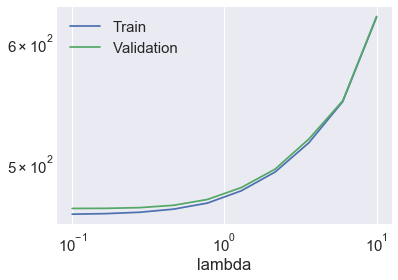

In [124]:
#validation curve
from sklearn.model_selection import validation_curve

lambdas = np.logspace(-1, 1, 10)

train_scores, test_scores = \
    validation_curve(estimator=pipe_lasso,
                     X=X_train,
                     y=y_train,
                     param_name='lasso__alpha',
                     param_range=lambdas,
                     scoring='neg_mean_squared_error',                 
                     cv=5)

mse_score = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                          'Validation':-test_scores.mean(axis=1),
                          'lambda':lambdas})\
              .set_index('lambda') 

mse_score.plot(logx=True, logy=True)

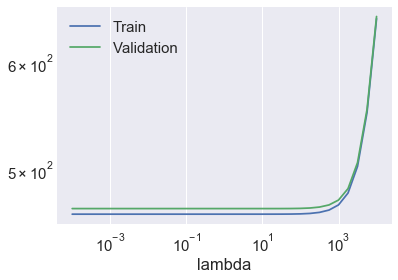

In [129]:
lambdas = np.logspace(-4, 4, 33)

train_scores, test_scores = \
    validation_curve(estimator=pipe_ridge,
                     X=X_train,
                     y=y_train,
                     param_name='ridge__alpha',
                     param_range=lambdas,
                     scoring='neg_mean_squared_error',                 
                     cv=5)

mse_score = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                          'Validation':-test_scores.mean(axis=1),
                          'lambda':lambdas})\
              .set_index('lambda') 

mse_score.plot(logx=True, logy=True)

In [ ]:
#PML p. 310: model slightly underfits data when we increase lambda
#overfits for large values: training accuracy>validation accuracy

In [72]:
cv_ela_rmse

[[21.702713032402816,
  21.43746950979275,
  22.42557491937483,
  22.267734245152557,
  20.773109311664452],
 [21.694157597119972,
  21.43006883497049,
  22.41537199011106,
  22.25513757671301,
  20.752557943479573],
 [21.681155201466336,
  21.419151918161774,
  22.399233952743568,
  22.234701960959967,
  20.718621268199342],
 [21.662698664359073,
  21.405516463657264,
  22.374963351389983,
  22.198512584650395,
  20.66393923299544],
 [21.647085093292862,
  21.39022821717526,
  22.343296588102994,
  22.157890124969526,
  20.57421950923229],
 [5.035607776442092e+24,
  5.255857864962082e+24,
  5.08449577275376e+24,
  5.060562754420118e+24,
  5.025321332625041e+24],
 [8.613829575826618e+106,
  9.181398819210801e+106,
  8.794017668580622e+106,
  8.417654434127297e+106,
  8.095714833641002e+106],
 [inf, inf, inf, inf, inf],
 [49.84598134187792,
  48.07191059028262,
  49.92294423415107,
  49.79674733622987,
  49.05070380953708],
 [49.84598134187792,
  48.07191059028262,
  49.92294423415107,


In [76]:
df = pd.DataFrame(cv_ela_rmse)
df.head()

,0,1,2,3,4
0,21.702713,21.437470,22.425575,22.267734,20.773109
1,21.694158,21.430069,22.415372,22.255138,20.752558
2,21.681155,21.419152,22.399234,22.234702,20.718621
3,21.662699,21.405516,22.374963,22.198513,20.663939
4,21.647085,21.390228,22.343297,22.157890,20.574220


In [80]:
mean = df.mean(axis=1) #husk at denne dataframe er for rmse
std = df.std(axis=1)

df['mean'] = mean
df['std'] = std
df.head()

,0,1,2,3,4,mean,std
0,21.702713,21.437470,22.425575,22.267734,20.773109,18.703381,8.003216
1,21.694158,21.430069,22.415372,22.255138,20.752558,18.693584,7.997927
2,21.681155,21.419152,22.399234,22.234702,20.718621,18.678031,7.989408
3,21.662699,21.405516,22.374963,22.198513,20.663939,18.653765,7.976165
4,21.647085,21.390228,22.343297,22.157890,20.574220,18.623043,7.956483


In [81]:
he = [list(t) for t in zip(*ela_net_combs)]

In [86]:
alpha_1 = pd.DataFrame(he[0])
alpha_2 = pd.DataFrame(he[1])
df['alpha_1'] = alpha_1
df['alpha_2'] = alpha_2
df.head()

,0,1,2,3,4,mean,std,alpha_1,alpha_2
0,21.702713,21.437470,22.425575,22.267734,20.773109,18.703381,8.003216,0.1,0.100000
1,21.694158,21.430069,22.415372,22.255138,20.752558,18.693584,7.997927,0.1,0.166810
2,21.681155,21.419152,22.399234,22.234702,20.718621,18.678031,7.989408,0.1,0.278256
3,21.662699,21.405516,22.374963,22.198513,20.663939,18.653765,7.976165,0.1,0.464159
4,21.647085,21.390228,22.343297,22.157890,20.574220,18.623043,7.956483,0.1,0.774264


In [87]:
#sort på mean
df = df.sort_values('mean')
df = df.reset_index()
df.head()

,index,0,1,2,3,4,mean,std,alpha_1,alpha_2
0,4,21.647085,21.390228,22.343297,22.157890,20.574220,18.623043,7.956483,0.100000,0.774264
1,14,21.655615,21.401755,22.355171,22.174175,20.622582,18.637972,7.967322,0.166810,0.774264
2,3,21.662699,21.405516,22.374963,22.198513,20.663939,18.653765,7.976165,0.100000,0.464159
3,24,21.688335,21.430754,22.388033,22.225106,20.711695,18.676051,7.989719,0.278256,0.774264
4,2,21.681155,21.419152,22.399234,22.234702,20.718621,18.678031,7.989408,0.100000,0.278256


In [107]:
#fjern means der er over 50
df = df.loc[df['mean'] < 50]

In [108]:
#behold kun dem hvor alpha_2=0.774264 som er den værdi der minimerer RMSE
df_alpha1 = df.loc[round(df['alpha_2'], 6) == 0.774264]
df_alpha2 = df.loc[round(df['alpha_1'], 6) == 0.100000]

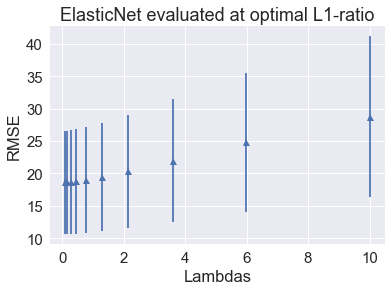

In [131]:
plt.errorbar(df_alpha1['alpha_1'].values, df_alpha1['mean'].values, yerr=df_alpha1['std'].values, linestyle='None', marker='^')
plt.title('ElasticNet evaluated at optimal alpha')
plt.ylabel('RMSE')
plt.xlabel('Lambdas')
plt.show()

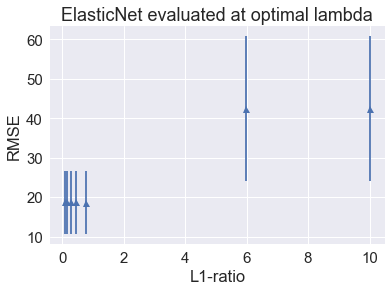

In [130]:
plt.errorbar(df_alpha2['alpha_2'].values, df_alpha2['mean'].values, yerr=df_alpha2['std'].values, linestyle='None', marker='^')
plt.title('ElasticNet evaluated at optimal lambda')
plt.ylabel('RMSE')
plt.xlabel('Alphas')
plt.show()

In [286]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

pipe_forest = make_pipeline(StandardScaler(), RandomForestRegressor())

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
max_features = ['auto', 'sqrt']

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

gs = RandomizedSearchCV(estimator=pipe_forest, 
                  param_distributions=param_grid, 
                  scoring='neg_mean_squared_error',
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
#print(gs.best_score_)
#print(gs.best_params)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x103bcb6f0, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x103bcb6f0, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/anaconda3/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
/anaconda3/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(15, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
/anaconda3/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(15, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (15, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=15, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 28, 13, 35, 38, 302223, tzinfo=tzutc()), 'msg_id': '2eb7e761be7b456b88a785759b6a1fa5', 'msg_type': 'execute_request', 'session': '687c5ae8a6314903bd24868bba41f5ef', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '2eb7e761be7b456b88a785759b6a1fa5', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'687c5ae8a6314903bd24868bba41f5ef']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 28, 13, 35, 38, 302223, tzinfo=tzutc()), 'msg_id': '2eb7e761be7b456b88a785759b6a1fa5', 'msg_type': 'execute_request', 'session': '687c5ae8a6314903bd24868bba41f5ef', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '2eb7e761be7b456b88a785759b6a1fa5', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'687c5ae8a6314903bd24868bba41f5ef'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 28, 13, 35, 38, 302223, tzinfo=tzutc()), 'msg_id': '2eb7e761be7b456b88a785759b6a1fa5', 'msg_type': 'execute_request', 'session': '687c5ae8a6314903bd24868bba41f5ef', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '2eb7e761be7b456b88a785759b6a1fa5', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import GridSearchCV...in)\n#print(gs.best_score_)\n#print(gs.best_params)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-286-8e91e89039c2>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1a1cf65f60, execution...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a1d1fcd20, file "<ipython-input-286-8e91e89039c2>", line 19>
        result = <ExecutionResult object at 1a1cf65f60, execution...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a1d1fcd20, file "<ipython-input-286-8e91e89039c2>", line 19>, result=<ExecutionResult object at 1a1cf65f60, execution...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a1d1fcd20, file "<ipython-input-286-8e91e89039c2>", line 19>
        self.user_global_ns = {'CV': 0.000100         353.577601
0.000178         353...212387
10000.000000    2428.212387
dtype: float64, 'ElasticNet': <class 'sklearn.linear_model.coordinate_descent.ElasticNet'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...iables.csv', sep=',', low_memory=False)\ndf.head()", 'df.keys()', "df.drop(['depart_date_time', 'handle_fee_ceiling...p', 'latitude_dep', 'longitude_dep', 'name_dep'])", "df.drop(['depart_date_time', 'handle_fee_ceiling...itude_dep', 'longitude_dep', 'name_dep'], axis=1)", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...iables.csv', sep=',', low_memory=False)\ndf.head()", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...270818.csv', sep=',', low_memory=False)\ndf.head()", 'df.keys()', "df.drop(['id', 'depart_date_time', 'handle_fee_r...', 'toll_road', 'time', 'date'], \n        axis=1)", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...270818.csv', sep=',', low_memory=False)\ndf.head()", "df.drop(['id', 'depart_date_time', 'handle_fee_r..., 'time_minute_hour'], \n        axis=1)\ndf.head()", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...270818.csv', sep=',', low_memory=False)\ndf.head()", "sample = df.drop(['id', 'depart_date_time', 'han...ime_minute_hour'], \n        axis=1)\nsample.head()", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...270818.csv', sep=',', low_memory=False)\ndf.head()", "sample = df.drop(['id', 'depart_date_time', 'han...       'SJ_dep', 'SJ_arr'], axis=1)\nsample.head()", '#correlation matrix - help to select features ba...ticklabels=sample, xticklabels=sample)\nplt.show()', "#correlation matrix - help to select features ba...     fmt='.2f', annot_kws={'size':15})\nplt.show()", 'sample.keys()', '#correlation matrix - help to select features ba...   yticklabels=cols, xticklabels=cols)\nplt.show()', '#correlation matrix - help to select features ba...   yticklabels=cols, xticklabels=cols)\nplt.show()', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {1:         id           depart_date_time  seats  fr...     74.306     0.740182  

[5 rows x 43 columns], 2: Index(['id', 'depart_date_time', 'seats', 'free_...stance_km', 'pris_per_km'],
      dtype='object'), 4:             id  seats  free_seats  user_id  hand...  75.553    0.661787  

[13444 rows x 30 columns], 5:         id           depart_date_time  seats  fr...     74.306     0.740182  

[5 rows x 43 columns], 6:         id           depart_date_time  seats  fr...        16.25  Afternoon  

[5 rows x 49 columns], 7: Index(['id', 'depart_date_time', 'seats', 'free_..._hour',
       'time_cat'],
      dtype='object'), 8:        seats  free_seats  user_id  accept_cash  ...n  
13439    Morning  

[13440 rows x 33 columns], 9:         id           depart_date_time  seats  fr...        16.25  Afternoon  

[5 rows x 49 columns], 10:         id           depart_date_time  seats  fr...        16.25  Afternoon  

[5 rows x 49 columns], 11:         id           depart_date_time  seats  fr...        16.25  Afternoon  

[5 rows x 49 columns], ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, ...}
        self.user_ns = {'CV': 0.000100         353.577601
0.000178         353...212387
10000.000000    2428.212387
dtype: float64, 'ElasticNet': <class 'sklearn.linear_model.coordinate_descent.ElasticNet'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...iables.csv', sep=',', low_memory=False)\ndf.head()", 'df.keys()', "df.drop(['depart_date_time', 'handle_fee_ceiling...p', 'latitude_dep', 'longitude_dep', 'name_dep'])", "df.drop(['depart_date_time', 'handle_fee_ceiling...itude_dep', 'longitude_dep', 'name_dep'], axis=1)", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...iables.csv', sep=',', low_memory=False)\ndf.head()", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...270818.csv', sep=',', low_memory=False)\ndf.head()", 'df.keys()', "df.drop(['id', 'depart_date_time', 'handle_fee_r...', 'toll_road', 'time', 'date'], \n        axis=1)", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...270818.csv', sep=',', low_memory=False)\ndf.head()", "df.drop(['id', 'depart_date_time', 'handle_fee_r..., 'time_minute_hour'], \n        axis=1)\ndf.head()", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...270818.csv', sep=',', low_memory=False)\ndf.head()", "sample = df.drop(['id', 'depart_date_time', 'han...ime_minute_hour'], \n        axis=1)\nsample.head()", "import pandas as pd\ndf = pd.read_csv('GoMore_Dat...270818.csv', sep=',', low_memory=False)\ndf.head()", "sample = df.drop(['id', 'depart_date_time', 'han...       'SJ_dep', 'SJ_arr'], axis=1)\nsample.head()", '#correlation matrix - help to select features ba...ticklabels=sample, xticklabels=sample)\nplt.show()', "#correlation matrix - help to select features ba...     fmt='.2f', annot_kws={'size':15})\nplt.show()", 'sample.keys()', '#correlation matrix - help to select features ba...   yticklabels=cols, xticklabels=cols)\nplt.show()', '#correlation matrix - help to select features ba...   yticklabels=cols, xticklabels=cols)\nplt.show()', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {1:         id           depart_date_time  seats  fr...     74.306     0.740182  

[5 rows x 43 columns], 2: Index(['id', 'depart_date_time', 'seats', 'free_...stance_km', 'pris_per_km'],
      dtype='object'), 4:             id  seats  free_seats  user_id  hand...  75.553    0.661787  

[13444 rows x 30 columns], 5:         id           depart_date_time  seats  fr...     74.306     0.740182  

[5 rows x 43 columns], 6:         id           depart_date_time  seats  fr...        16.25  Afternoon  

[5 rows x 49 columns], 7: Index(['id', 'depart_date_time', 'seats', 'free_..._hour',
       'time_cat'],
      dtype='object'), 8:        seats  free_seats  user_id  accept_cash  ...n  
13439    Morning  

[13440 rows x 33 columns], 9:         id           depart_date_time  seats  fr...        16.25  Afternoon  

[5 rows x 49 columns], 10:         id           depart_date_time  seats  fr...        16.25  Afternoon  

[5 rows x 49 columns], 11:         id           depart_date_time  seats  fr...        16.25  Afternoon  

[5 rows x 49 columns], ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/Users/bruger/Documents/GitHub/Social-Data-Science-Group-8/<ipython-input-286-8e91e89039c2> in <module>()
     14                   param_distributions=param_grid, 
     15                   scoring='neg_mean_squared_error',
     16                   cv=5,
     17                   n_jobs=-1)
     18 
---> 19 gs = gs.fit(X_train, y_train)
     20 #print(gs.best_score_)
     21 #print(gs.best_params)

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=RandomizedSearchCV(cv=5, error_score='raise',
  ...ng='neg_mean_squared_error',
          verbose=0), X=array([[1., 0., ..., 0., 0.],
       [1., 1., ..... 3., ..., 0., 0.],
       [3., 3., ..., 0., 0.]]), y=array([120.,  55., ..., 145., 150.]), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=False)>
        X = array([[1., 0., ..., 0., 0.],
       [1., 1., ..... 3., ..., 0., 0.],
       [3., 3., ..., 0., 0.]])
        y = array([120.,  55., ..., 145., 150.])
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Aug 28 15:35:38 2018
PID: 66905                              Python 3.6.5: /anaconda3/bin/python
...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('standardscal...andom_state=None, verbose=0, warm_start=False))]), memmap([[1., 0., ..., 0., 0.],
        [1., 1., ...3., ..., 0., 0.],
        [3., 3., ..., 0., 0.]]), array([120.,  55., ..., 145., 150.]), {'score': make_scorer(mean_squared_error, greater_is_better=False)}, array([ 2144,  2145, ..., 10718, 10719]), array([   0,    1, ..., 2142, 2143]), 0, {'max_features': 'sqrt', 'n_estimators': 244}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('standardscal...andom_state=None, verbose=0, warm_start=False))]), memmap([[1., 0., ..., 0., 0.],
        [1., 1., ...3., ..., 0., 0.],
        [3., 3., ..., 0., 0.]]), array([120.,  55., ..., 145., 150.]), {'score': make_scorer(mean_squared_error, greater_is_better=False)}, array([ 2144,  2145, ..., 10718, 10719]), array([   0,    1, ..., 2142, 2143]), 0, {'max_features': 'sqrt', 'n_estimators': 244})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('standardscal...andom_state=None, verbose=0, warm_start=False))]), X=memmap([[1., 0., ..., 0., 0.],
        [1., 1., ...3., ..., 0., 0.],
        [3., 3., ..., 0., 0.]]), y=array([120.,  55., ..., 145., 150.]), scorer={'score': make_scorer(mean_squared_error, greater_is_better=False)}, train=array([ 2144,  2145, ..., 10718, 10719]), test=array([   0,    1, ..., 2142, 2143]), verbose=0, parameters={'max_features': 'sqrt', 'n_estimators': 244}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...ndom_state=None, verbose=0, warm_start=False))])>
        parameters = {'max_features': 'sqrt', 'n_estimators': 244}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('standardscal...andom_state=None, verbose=0, warm_start=False))]), **kwargs={'max_features': 'sqrt', 'n_estimators': 244})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...ndom_state=None, verbose=0, warm_start=False))])>
        kwargs = {'max_features': 'sqrt', 'n_estimators': 244}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/utils/metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('standardscal...andom_state=None, verbose=0, warm_start=False))]), attr='steps', **params={'max_features': 'sqrt', 'n_estimators': 244})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...ndom_state=None, verbose=0, warm_start=False))])>
        params = {'max_features': 'sqrt', 'n_estimators': 244}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=Pipeline(memory=None,
     steps=[('standardscal...andom_state=None, verbose=0, warm_start=False))]), **params={'max_features': 'sqrt', 'n_estimators': 244})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'n_estimators'
        self = Pipeline(memory=None,
     steps=[('standardscal...andom_state=None, verbose=0, warm_start=False))])
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter n_estimators for estimator Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [ ]:
#choose preferred model
#in this dataset with only 3 variables, it is lasso with the lowest rmse - with alpha=1
#use '1 std error rule'

#run lasso model on whole train data set (in the cross val it is only run on k subsets of the train data)


In [201]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                              criterion='mse',
                              random_state=1,n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
print(mse(y_train, y_train_pred))

1.5769007932835821


In [288]:
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11)}

n_iter_search = 20
random_search = RandomizedSearchCV(RandomForestRegressor(n_estimators=1000), param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1e5b4128>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [292]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 2)] #num = num samples
max_features = ['auto', 'sqrt']

cv_forest = []

for item in n_estimators:
    pipe_forest = make_pipeline(StandardScaler(), 
                               RandomForestRegressor(n_estimators=item,
                                                    random_state=1,
                                                    n_jobs=-1))
    scores_forest = cross_val_score(pipe_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_forest.append(list(-1*scores_forest))

In [293]:
cv_forest

[[21.78104538246269,
  9.296971233675373,
  21.097050676305972,
  13.743022154850749,
  10.455162931436567],
 [21.665589939948696,
  9.296909532416047,
  21.479816126399253,
  13.12336890158582,
  10.204567417793843]]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                              criterion='mse',
                              random_state=1,n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
print(mse(y_train, y_train_pred))

In [202]:
y_test_pred = forest.predict(X_test)
print(mse(y_test, y_test_pred))

6.050548466616934


In [174]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10)
mseCV = [] #store mean sq error cross validation

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=1)

lambdas = np.logspace(-4, 4, 33)
for lambda_ in lambdas:
    
    pipe_lassoCV = make_pipeline(StandardScaler(),
                                 Ridge(alpha=lambda_, random_state=1))    
    mseCV_ = [] #for each lambda and each iteration we store mse
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev): #train indeces, validation indeces
        
        X_train, y_train, = X_dev[train_idx], y_dev[train_idx] #each iteration take out training and validation
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 

        pipe_lassoCV.fit(X_train, y_train)
        
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))    #fit on training, test on validation
    mseCV.append(mseCV_)

In [175]:
optimalCV = pd.DataFrame(mseCV, index=lambdas).mean(axis=1).nsmallest(1)
optimalCV

31.622777    358.900289
dtype: float64